# Для данного задания рассмотрим распределение Гамбела 
## Распределение Гамбела используется для моделирования распределения максимума или минимумаряда выборок различных распределений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

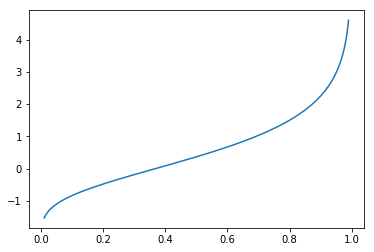

In [2]:
axis = np.linspace(0.01, 0.99, 1000)
ppf = sts.gumbel_r.ppf(axis)
plt.plot(axis, ppf)

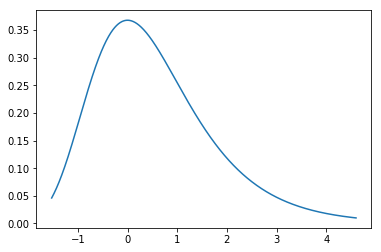

In [3]:
x = np.linspace(sts.gumbel_r.ppf(0.01), sts.gumbel_r.ppf(0.99), 1000)
pdf =  sts.gumbel_r.pdf(x)
plt.plot(x, pdf, label='gumbel_r pdf')

### Сгенерируем выборку размера 1000 и построим гистограмму, сравнив ее с графиком функции распределения 

In [4]:
r = sts.gumbel_r.rvs(size=1000)

/Users/apple/opt/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


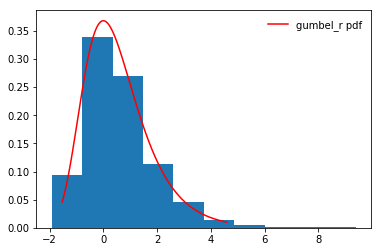

In [5]:
plt.plot(x, pdf, 'r-', label='gumbel_r pdf')
plt.hist(r, normed= True)
plt.legend(loc='best', frameon=False)
plt.show()

### при трёх и более значениях n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних

In [6]:
n = [5, 10, 50]
#создадим нулевой массив, который потом заполним средние
distributionSamples = np.zeros( (len(n), 1000) )

In [7]:
for i in xrange( len(n) ):
    for j in xrange(1000):
        #генерируем распределение Гамбела
        currentDist = np.array(sts.gumbel_r.rvs(size=1000))
        #находим среднее значение выборки
        currentMean = currentDist.mean()
        #записываем в массив
        distributionSamples[i, j] = currentMean
        
print distributionSamples

[[0.58982578 0.55066262 0.55060229 ... 0.60672633 0.64216133 0.56305891]
 [0.55826376 0.62296837 0.59533569 ... 0.5802453  0.60883772 0.57291836]
 [0.58514974 0.61700943 0.52005122 ... 0.60376443 0.54487514 0.5951576 ]]


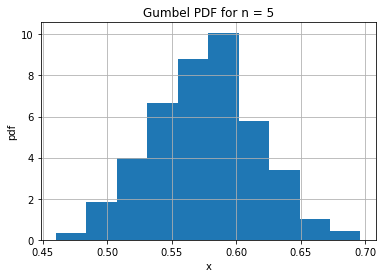

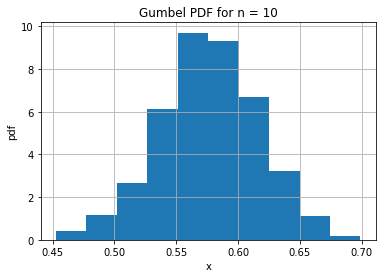

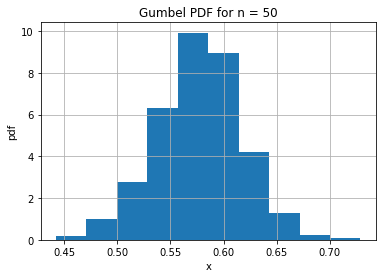

In [8]:
for i in xrange( len(n) ):
    plt.hist(distributionSamples[i], bins=10, normed=True)
    plt.grid()
    plt.title('Gumbel PDF for n = ' + str(n[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()

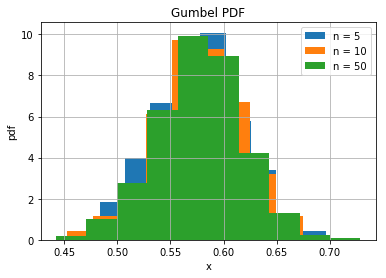

In [9]:
for i in xrange( len(n) ):
    plt.hist(distributionSamples[i], bins=10, normed=True, label='n = ' + str(n[i]))
    plt.grid()
    plt.title('Gumbel PDF')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

### Найдем среднее исходного распределения

In [10]:
mean, var, skew, kurt = sts.gumbel_r.stats(moments='mvsk')

### Построим графики нормального распределения на гистограммах средних выборок

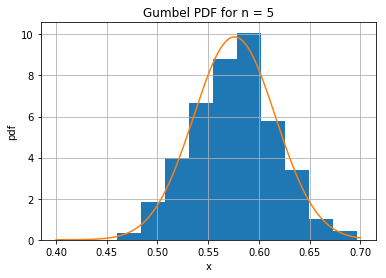

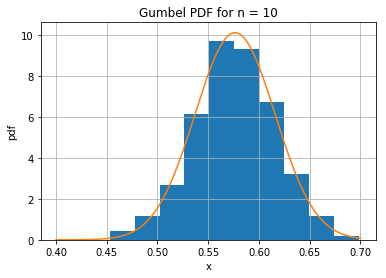

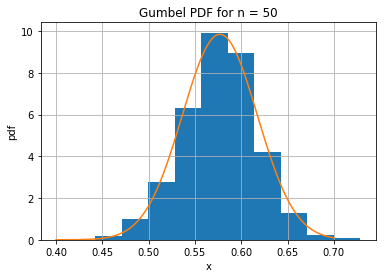

In [11]:
for i in xrange( len(n) ):
    plt.hist(distributionSamples[i], bins=10, normed=True)
    plt.grid()
    plt.title('Gumbel PDF for n = ' + str(n[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    # посчитаем среднее и отклонение
    mean = np.mean(distributionSamples[i])
    var = np.var(distributionSamples[i])
    sigma = math.sqrt(var)
    # построим нормальное (Гауссовское) распределение
    normRv = sts.norm(loc=mean, scale=sigma) 
    x = np.linspace(0.4,0.7,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()

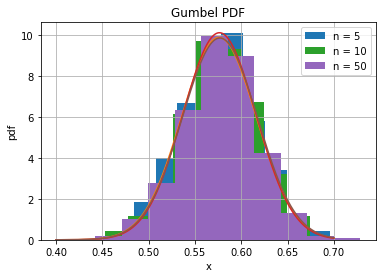

In [12]:
for i in xrange( len(n) ):
    plt.hist(distributionSamples[i], bins=10, normed=True, label='n = ' + str(n[i]))
    plt.grid()
    plt.title('Gumbel PDF')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    # посчитаем среднее и отклонение 
    mean = np.mean(distributionSamples[i])
    var = np.var(distributionSamples[i])
    sigma = math.sqrt(var)
    # построим нормальное (Гауссовское) распределение
    normRv = sts.norm(loc=mean, scale=sigma) 
    x = np.linspace(0.4,0.7,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

## Вывод 
### Посчитав средние каждой выборки мы построили их гистограммы, на которые в последующем наложили графики Гауссовского распределения. Из полученных результатов видно, что графики накладываются на гистограммы и хорошо их описывают. Этим, можно подтвердить верность Центральной предельной теоремы
### С изменением n мы наблюдаем изменение аппроксимации